In [4]:
#!/usr/bin/env python3
"""
Neven Caplar 
Last updated: 2023-10-07

Goals: 
Analyze the data

Each Section can/should be able to run independently,
only these initial imports should be shared among all sections

"""
import numpy as np
import pandas as pd
import time

# from scipy.spatial import KDTree
import matplotlib.pyplot as plt

import JaxPeriodDrwFit


from tape.ensemble import Ensemble
from tape.utils import ColumnMapper

# Tape Single Pixel - real data 

In [7]:
"""
0. Negative log-likelihood of the Gaussian Process model
1. log_drw_scale = theta[0]
2. log_drw_amp = theta[1]
3. log_per_scale = theta[2]
4. log_per_amp = theta[3]
"""

res_tsp_run_0 = pd.read_parquet('/astro/users/ncaplar/data/res_tsp_run_g_0.parquet', engine='pyarrow')
res_tsp_run_0_drw = pd.read_parquet('/astro/users/ncaplar/data/res_tsp_run_g_0_drw.parquet', engine='pyarrow')
# numpy version of the results
res_tsp_run_0_np = np.vstack(res_tsp_run_0.values)
res_tsp_run_0_drw_np = np.vstack(res_tsp_run_0_drw.values)

(-4.573448938230841, -0.37241121792680354)

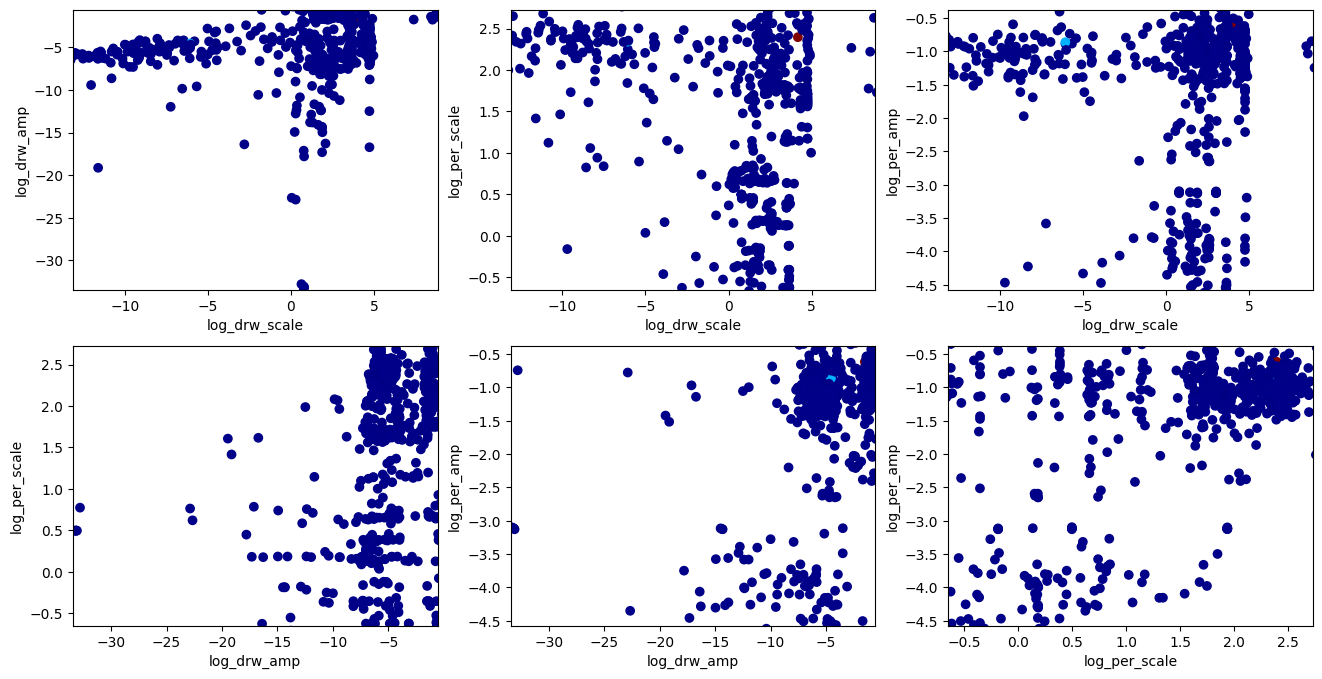

In [8]:
res = res_tsp_run_0_np
res_drw = res_tsp_run_0_drw_np
# larger numbers, bigger relative improvment
improvment = (res[:,0]-res_drw[:,0])/res_drw[:,0]

plt.figure(figsize=(16,8))
plt.subplot(2,3, 1)
plt.scatter(res[:,1],res[:,2], c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_drw_amp')
#plt.axvline(np.log10(drw_tau), ls=':')
#plt.axhline(np.log10(drw_amp), ls=':')
plt.xlim(np.quantile(res[:,1],0.05) - .1, np.quantile(res[:,1],0.95) + .1)
plt.ylim(np.quantile(res[:,2],0.05) - .1, np.quantile(res[:,2],0.95) + .1)


plt.subplot(2, 3, 2)
plt.scatter(res[:,1],res[:,3]-np.log10(2*np.pi), c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_per_scale')
# plt.axvline(np.log10(drw_tau), ls=':')
# plt.axhline(np.log10(per_tau), ls=':')
plt.xlim(np.quantile(res[:,1],0.05)- .1, np.quantile(res[:,1],0.95)+ .1)
plt.ylim(np.quantile(res[:,3],0.05)-np.log10(2*np.pi) - .1, np.quantile(res[:,3],0.95)-np.log10(2*np.pi)+ .1)

plt.subplot(2, 3, 3)
plt.scatter(res[:,1],res[:,4], c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_per_amp')
# plt.axvline(np.log10(drw_tau), ls=':')
# plt.axhline(np.log10(per_amp), ls=':')
plt.xlim(np.quantile(res[:,1],0.05)- .1, np.quantile(res[:,1],0.95)+ .1)
plt.ylim(np.quantile(res[:,4],0.05)- .1, np.quantile(res[:,4],0.95)+ .1)

plt.subplot(2, 3, 4)
plt.scatter(res[:,2],res[:,3]-np.log10(2*np.pi), c=improvment, cmap='jet')
plt.xlabel('log_drw_amp')
plt.ylabel('log_per_scale')
# plt.axvline(np.log10(drw_amp), ls=':')
# plt.axhline(np.log10(per_tau), ls=':')
plt.xlim(np.quantile(res[:,2],0.05)- .1, np.quantile(res[:,2],0.95)+ .1)
plt.ylim(np.quantile(res[:,3]-np.log10(2*np.pi),0.05)- .1, np.quantile(res[:,3]-np.log10(2*np.pi),0.95)+ .1)

plt.subplot(2, 3, 5)
plt.scatter(res[:,2],res[:,4], c=improvment, cmap='jet')
plt.xlabel('log_drw_amp')
plt.ylabel('log_per_amp')
# plt.axvline(np.log10(drw_amp), ls=':')
# plt.axhline(np.log10(per_amp), ls=':')
plt.xlim(np.quantile(res[:,2],0.05)- .1, np.quantile(res[:,2],0.95)+ .1)
plt.ylim(np.quantile(res[:,4],0.05)- .1, np.quantile(res[:,4],0.95)+ .1)

plt.subplot(2, 3, 6)
plt.scatter(res[:,3]-np.log10(2*np.pi),res[:,4], c=improvment, cmap='jet')
plt.xlabel('log_per_scale')
plt.ylabel('log_per_amp')
# plt.axhline(np.log10(per_amp), ls=':')
# plt.axvline(np.log10(per_tau), ls=':')
plt.xlim(np.quantile(res[:,3],0.05)-np.log10(2*np.pi)- .1, np.quantile(res[:,3],0.95)-np.log10(2*np.pi)+ .1)
plt.ylim(np.quantile(res[:,4],0.05)- .1, np.quantile(res[:,4],0.95)+ .1) 

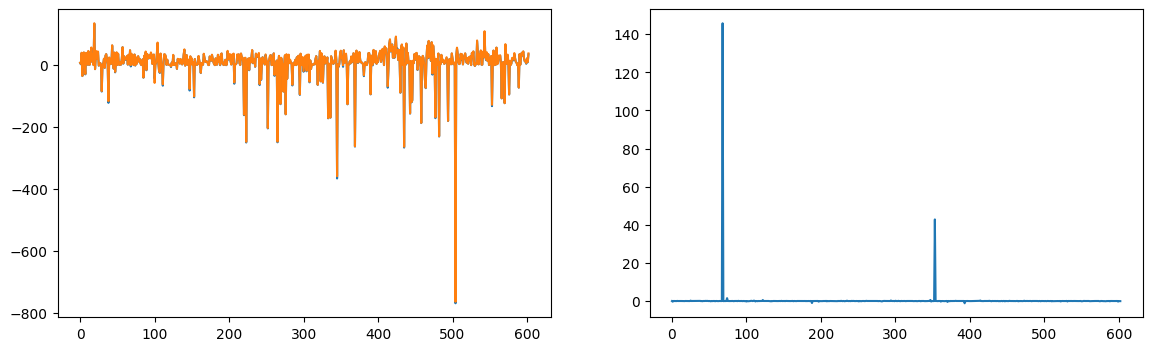

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(res[:,0])
plt.plot(res_drw[:,0])

plt.subplot(122)
plt.plot((res[:,0]-res_drw[:,0])/res_drw[:,0])

In [28]:
# shows which one have greates absolute improvment
df = pd.DataFrame(res_tsp_run_0['neg_log_lh']-res_tsp_run_0_drw['neg_log_lh'])
df.sort_values(by='neg_log_lh', inplace=True)
df

,neg_log_lh
SDSS_NAME_dr16q_constant,
023922.87-000119.6,-7.513662
024257.86+001946.0,-6.014756
024220.73-002059.7,-5.444676
024455.18-002501.5,-5.287191
023945.93-001220.0,-5.172376
...,...
024300.48+001155.2,0.000001
024638.60-002036.3,0.000001
024502.80-000419.9,0.000001
